<a href="https://www.kaggle.com/code/mayarmohamedswilam/start-ups?scriptVersionId=221698766" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Import necessary libraries such as NumPy, pandas, and seaborn.
List files in the '/kaggle/input/' directory.
Read a CSV file ('companies.csv') into a DataFrame.
Display basic information about the DataFrame using df.info().
Drop unnecessary columns, fill missing numerical values with 0, and convert date columns to datetime format.
Remove duplicate rows from the DataFrame.
Drop columns with a high percentage of missing values.
Drop specific columns ('normalized_name', 'entity_id', 'short_description').
Filter data to select only operating companies with funding greater than 100,000 USD.
Group the data by 'category_code' and calculate the mean of 'investment_rounds' within each category.
Calculate the total funding received by each company by multiplying 'funding_total_usd' and 'funding_rounds' and store it in a new column 'total_funding'.
Sort the DataFrame by 'total_funding' in descending order.
Count the number of companies in each category using 'value_counts()'.
Calculate the average funding received by companies with a 'status' of 'acquired'.
Calculate the age of companies based on their 'founded_at' date and the current date.
Group the data by 'status' and calculate the mean of 'milestones' and 'relationships'.
Create a pivot table to analyze the mean 'investment_rounds' for each 'category_code' within different 'status' categories.

**Data cleaning**

In [1]:
import pandas as pd

# Assuming the CSV file is in the current working directory
csv_file_path = '/kaggle/input/ofhddd/companies.csv'

# Create a DataFrame from the CSV file
df = pd.read_csv(csv_file_path)
print(df.head())  # Display the first few rows of the DataFrame

        id  Unnamed: 0.1 entity_type  entity_id  parent_id  \
0      c:1             0     Company          1        NaN   
1     c:10             1     Company         10        NaN   
2    c:100             2     Company        100        NaN   
3  c:10000             3     Company      10000        NaN   
4  c:10001             4     Company      10001        NaN   

                 name     normalized_name                    permalink  \
0            Wetpaint            wetpaint            /company/wetpaint   
1             Flektor             flektor             /company/flektor   
2               There               there               /company/there   
3             MYWEBBO             mywebbo             /company/mywebbo   
4  THE Movie Streamer  the movie streamer  /company/the-movie-streamer   

     category_code     status  ... first_milestone_at last_milestone_at  \
0              web  operating  ...         2010-09-05        2013-09-18   
1      games_video   acquired  .

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [3]:
df.shape

(196553, 44)

**Drop unnecessary columns**

In [4]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0.1', 'permalink']
df.drop(columns=columns_to_drop, inplace=True)

**For demonstration purposes, we'll fill missing numerical values with 0**

In [5]:
# For demonstration purposes, we'll fill missing numerical values with 0
df.fillna(0, inplace=True)

In [6]:
# Convert date columns to datetime format
date_columns = ['first_milestone_at', 'last_milestone_at', 'created_at', 'updated_at']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert invalid dates to NaT

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   196553 non-null  object        
 1   entity_type          196553 non-null  object        
 2   entity_id            196553 non-null  int64         
 3   parent_id            196553 non-null  float64       
 4   name                 196553 non-null  object        
 5   normalized_name      196553 non-null  object        
 6   category_code        196553 non-null  object        
 7   status               196553 non-null  object        
 8   founded_at           196553 non-null  object        
 9   closed_at            196553 non-null  object        
 10  domain               196553 non-null  object        
 11  homepage_url         196553 non-null  object        
 12  twitter_username     196553 non-null  object        
 13  logo_url      

In [8]:
df.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,Company,1,0.0,Wetpaint,wetpaint,web,operating,2005-10-17,0,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,Company,10,0.0,Flektor,flektor,games_video,acquired,0,0,...,1970-01-01,1970-01-01,0.0,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,0.0
2,c:100,Company,100,0.0,There,there,games_video,acquired,0,0,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,0.0
3,c:10000,Company,10000,0.0,MYWEBBO,mywebbo,network_hosting,operating,2008-07-26,0,...,1970-01-01,1970-01-01,0.0,0.0,0,2008-08-24 16:51:57,2008-09-06 14:19:18,0.000000,0.000000,0.0
4,c:10001,Company,10001,0.0,THE Movie Streamer,the movie streamer,games_video,operating,2008-07-26,0,...,1970-01-01,1970-01-01,0.0,0.0,0,2008-08-24 17:10:34,2008-09-06 14:19:18,0.000000,0.000000,0.0


In [9]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
print(missing_percentages)

id                     0.0
entity_type            0.0
entity_id              0.0
parent_id              0.0
name                   0.0
normalized_name        0.0
category_code          0.0
status                 0.0
founded_at             0.0
closed_at              0.0
domain                 0.0
homepage_url           0.0
twitter_username       0.0
logo_url               0.0
logo_width             0.0
logo_height            0.0
short_description      0.0
description            0.0
overview               0.0
tag_list               0.0
country_code           0.0
state_code             0.0
city                   0.0
region                 0.0
first_investment_at    0.0
last_investment_at     0.0
investment_rounds      0.0
invested_companies     0.0
first_funding_at       0.0
last_funding_at        0.0
funding_rounds         0.0
funding_total_usd      0.0
first_milestone_at     0.0
last_milestone_at      0.0
milestones             0.0
relationships          0.0
created_by             0.0
c

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
threshold = 0.7  # Set a threshold for the percentage of NaN values
columns_to_drop = df.columns[df.isnull().mean() > threshold]
df.drop(columns=columns_to_drop, inplace=True)

In [12]:
columns_to_drop = ['normalized_name', 'entity_id', 'short_description']
df.drop(columns=columns_to_drop, inplace=True)

**Data Processing**

**Filtering Data**

In [13]:
filtered_df = df[(df['status'] == 'operating') & (df['funding_total_usd'] > 100000)]
print(filtered_df)

              id entity_type  parent_id                     name  \
0            c:1     Company        0.0                 Wetpaint   
19       c:10015     Company        0.0                   Fitbit   
20      c:100155     Company        0.0                     MTPV   
24       c:10018     Company        0.0               Demandbase   
26      c:100189     Company        0.0  Locatrix Communications   
...          ...         ...        ...                      ...   
196532     c:998     Company        0.0                    Wamba   
196537   c:99853     Company        0.0             ChatterBlock   
196547    c:9994     Company        0.0                   Imindi   
196549    c:9995     Company        0.0                   FohBoh   
196552    c:9998     Company        0.0           Closet Couture   

           category_code     status  founded_at closed_at             domain  \
0                    web  operating  2005-10-17         0   wetpaint-inc.com   
19                healt

**Grouping Data**

In [14]:
grouped_df = df.groupby('category_code')['investment_rounds'].mean()
print(grouped_df)

category_code
0                   0.025924
advertising         0.009675
analytics           0.001957
automotive          0.000000
biotech             0.053499
cleantech           0.021649
consulting          0.024970
design              0.000000
ecommerce           0.008163
education           0.005860
enterprise          0.035127
fashion             0.005329
finance             0.949495
games_video         0.010505
government          0.162791
hardware            0.041003
health              0.042403
hospitality         0.001302
legal               0.003953
local               0.002548
manufacturing       0.005882
medical             0.002602
messaging           0.023649
mobile              0.017779
music               0.000000
nanotech            0.028571
network_hosting     0.052340
news                0.058594
nonprofit           0.038043
other               0.050305
pets                0.016393
photo_video         0.001838
public_relations    0.039002
real_estate         0.008439


**Calculations**

calculate the total funding received by each company

In [15]:
df['total_funding'] = df['funding_total_usd'] * df['funding_rounds']
print(df[['name', 'total_funding']])

                      name  total_funding
0                 Wetpaint    119250000.0
1                  Flektor            0.0
2                    There            0.0
3                  MYWEBBO            0.0
4       THE Movie Streamer            0.0
...                    ...            ...
196548           Webgility            0.0
196549              FohBoh       750000.0
196550                 CSC            0.0
196551       Top-candidate            0.0
196552      Closet Couture       475000.0

[196553 rows x 2 columns]


**Sorting Data**

In [16]:
sorted_df = df.sort_values(by='total_funding', ascending=False)
print(sorted_df[['name', 'total_funding']])

                     name  total_funding
161551           Facebook   2.668270e+10
4575            Clearwire   2.280000e+10
81001            Solyndra   1.588954e+10
170979  Fisker Automotive   1.305900e+10
3446            SolarCity   1.025752e+10
...                   ...            ...
81003   Cardinal Scholars   0.000000e+00
16892                KTLA   0.000000e+00
81005         Wisenut Inc   0.000000e+00
81006             Ellianz   0.000000e+00
98276          Ganttzilla   0.000000e+00

[196553 rows x 2 columns]


**Counting Categories**

 count the number of companies

In [17]:
category_counts = df['category_code'].value_counts()
print(category_counts)

0                   73367
software            17922
web                 15118
other               13617
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
medical              1153
analytics            1022
legal                1012
travel                936
local                 785
news                  768
hospitality           768
semiconductor         696
manufacturing         680
sports                675
music                 581
fashion               563
photo_video           544
transportation        489
real_estate           474
messaging             296
automotive            291
design      

**Conditional Calculations**

Calculate the average funding received by companies with a "status" of "acquired"

In [18]:
average_funding_acquired = df[df['status'] == 'acquired']['funding_total_usd'].mean()
print("Average funding for acquired companies:", average_funding_acquired)

Average funding for acquired companies: 5475722.324249521


**Creating New Columns**

*********
Calculate the age of companies based on their "founded_at" date and the current date:


In [19]:
from datetime import datetime
# Convert 'founded_at' column to datetime format
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')

# Calculate company age based on the 'founded_at' column
current_year = datetime.now().year
df['company_age'] = current_year - df['founded_at'].dt.year

print(df[['name', 'company_age']])

                      name  company_age
0                 Wetpaint           20
1                  Flektor           55
2                    There           55
3                  MYWEBBO           17
4       THE Movie Streamer           17
...                    ...          ...
196548           Webgility           18
196549              FohBoh           18
196550                 CSC           66
196551       Top-candidate           17
196552      Closet Couture           18

[196553 rows x 2 columns]


In [20]:
df[['name', 'company_age']].head()

,name,company_age
0,Wetpaint,20
1,Flektor,55
2,There,55
3,MYWEBBO,17
4,THE Movie Streamer,17


**Aggregation with Grouping**

In [21]:
aggregated_group = df.groupby('status')[['milestones', 'relationships']].mean()
print(aggregated_group)

           milestones  relationships
status                              
acquired     0.757931       3.421759
closed       0.782121       2.310759
ipo          1.578483      23.253968
operating    0.539972       1.664481


**Pivot Table**

In [22]:
pivot_table = df.pivot_table(index='status', columns='category_code', values='investment_rounds', aggfunc='mean')
print(pivot_table)

category_code         0  advertising  analytics  automotive   biotech  \
status                                                                  
acquired       0.008073     0.022436   0.000000         0.0  0.021978   
closed         0.000000     0.000000   0.000000         0.0  0.008547   
ipo            0.538462     0.208333   0.000000         0.0  0.449393   
operating      0.026302     0.008294   0.002073         0.0  0.031847   

category_code  cleantech  consulting  design  ecommerce  education  ...  \
status                                                              ...   
acquired        0.000000    0.014706     0.0   0.036900   0.000000  ...   
closed          0.000000    0.032258     0.0   0.000000   0.000000  ...   
ipo             0.232143    0.238095     NaN   1.360000   0.000000  ...   
operating       0.017109    0.024284     0.0   0.003485   0.005954  ...   

category_code  real_estate    search  security  semiconductor    social  \
status                             

**Data Labeling**

**the average value of the "software" category for companies that went public (IPO)**

In [23]:
avg_software_for_ipo = pivot_table.loc['ipo', 'software']
print("Average value of the 'software' category for IPO companies:", avg_software_for_ipo)

Average value of the 'software' category for IPO companies: 0.9035087719298246


**Which category has the lowest average value for companies that are acquired**

In [24]:
lowest_avg_category_acquired = pivot_table.loc['acquired'].idxmin()
lowest_avg_value_acquired = pivot_table.loc['acquired'].min()
print("Category with the lowest average value for acquired companies:", lowest_avg_category_acquired)
print("Lowest average value for acquired companies:", lowest_avg_value_acquired)

Category with the lowest average value for acquired companies: analytics
Lowest average value for acquired companies: 0.0


**the total average value of all categories for companies that are operating**

In [25]:
total_avg_value_operating = pivot_table.loc['operating'].mean()
print("Total average value of all categories for operating companies:", total_avg_value_operating)

Total average value of all categories for operating companies: 0.03972185412316683


**Which category has the highest variation (standard deviation) of average values across different statuses?**

In [26]:
highest_variation_category = pivot_table.std().idxmax()
highest_variation_value = pivot_table.std().max()
print("Category with the highest variation of average values:", highest_variation_category)
print("Highest variation value:", highest_variation_value)

Category with the highest variation of average values: search
Highest variation value: 3.1662617532802226


**For IPO companies, category has the highest average value per company (excluding NaN values)**

In [27]:
avg_per_company_for_ipo = pivot_table.loc['ipo'] / pivot_table.loc['ipo'].count()
highest_avg_per_company_category_ipo = avg_per_company_for_ipo.idxmax()
highest_avg_per_company_value_ipo = avg_per_company_for_ipo.max()
print("Category with the highest average value per company for IPO companies:", highest_avg_per_company_category_ipo)
print("Highest average value per company for IPO companies:", highest_avg_per_company_value_ipo)

Category with the highest average value per company for IPO companies: search
Highest average value per company for IPO companies: 0.16666666666666666


**the most common status among companies in the "web" category**

In [28]:
most_common_status_web = pivot_table['web'].idxmax()
print("Most common status among companies in the 'web' category:", most_common_status_web)

Most common status among companies in the 'web' category: ipo


**the highest average value for companies that are closed**

In [29]:
highest_avg_value_closed_category = pivot_table.loc['closed'].idxmax()
highest_avg_value_closed = pivot_table.loc['closed'].max()
print("Category with the highest average value for closed companies:", highest_avg_value_closed_category)
print("Highest average value for closed companies:", highest_avg_value_closed)

Category with the highest average value for closed companies: manufacturing
Highest average value for closed companies: 0.2


**the total number of companies in the "software" category for each status**

In [30]:
total_companies_software = pivot_table['software'].sum()
print("Total number of companies in the 'software' category:", total_companies_software)

Total number of companies in the 'software' category: 0.9385470456738285


**the highest average value of milestones for companies that are acquired**

In [31]:
highest_avg_analytics_category_acquired = pivot_table.loc['acquired'].idxmax()
highest_avg_analytics_value_acquired = pivot_table.loc['acquired'].max()
print("Category with the highest average value for 'acquired' companies:", highest_avg_analytics_category_acquired)
print("Highest average value for 'acquired' companies:", highest_avg_analytics_value_acquired)

Category with the highest average value for 'acquired' companies: transportation
Highest average value for 'acquired' companies: 0.2857142857142857


**the average value of the "semiconductor" category for companies that are operating**

In [32]:
avg_semiconductor_operating = pivot_table.loc['operating', 'semiconductor']
print("Average value of the 'semiconductor' category for operating companies:", avg_semiconductor_operating)

Average value of the 'semiconductor' category for operating companies: 0.03956043956043956


**the average value of the "advertising" category for companies that are operating**

In [33]:
avg_advertising_for_operating = pivot_table.loc['operating', 'advertising']
print("Average value of the 'advertising' category for operating companies:", avg_advertising_for_operating)

Average value of the 'advertising' category for operating companies: 0.008293629786483148


**the highest average value for companies that went public (IPO)**

In [34]:
highest_avg_category_ipo = pivot_table.loc['ipo'].idxmax()
highest_avg_value_ipo = pivot_table.loc['ipo'].max()
print("Category with the highest average value for IPO companies:", highest_avg_category_ipo)
print("Highest average value for IPO companies:", highest_avg_value_ipo)

Category with the highest average value for IPO companies: search
Highest average value for IPO companies: 6.333333333333333


**the average value of the "analytics" category for companies that are closed**

In [35]:
avg_analytics_for_closed = pivot_table.loc['closed', 'analytics']
print("Average value of the 'analytics' category for closed companies:", avg_analytics_for_closed)

Average value of the 'analytics' category for closed companies: 0.0


**For companies that are operating, what is the category with the second-highest average value**

In [36]:
second_highest_avg_category_operating = pivot_table.loc['operating'].nlargest(2).idxmin()
second_highest_avg_value_operating = pivot_table.loc['operating'].nlargest(2).min()
print("Category with the second-highest average value for operating companies:", second_highest_avg_category_operating)
print("Second-highest average value for operating companies:", second_highest_avg_value_operating)

Category with the second-highest average value for operating companies: government
Second-highest average value for operating companies: 0.16279069767441862


**the average value of the "ecommerce" category for companies that are acquired**

In [37]:
avg_ecommerce_for_acquired = pivot_table.loc['acquired', 'ecommerce']
print("Average value of the 'ecommerce' category for acquired companies:", avg_ecommerce_for_acquired)

Average value of the 'ecommerce' category for acquired companies: 0.03690036900369004


**data visualization**

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/2479101375.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


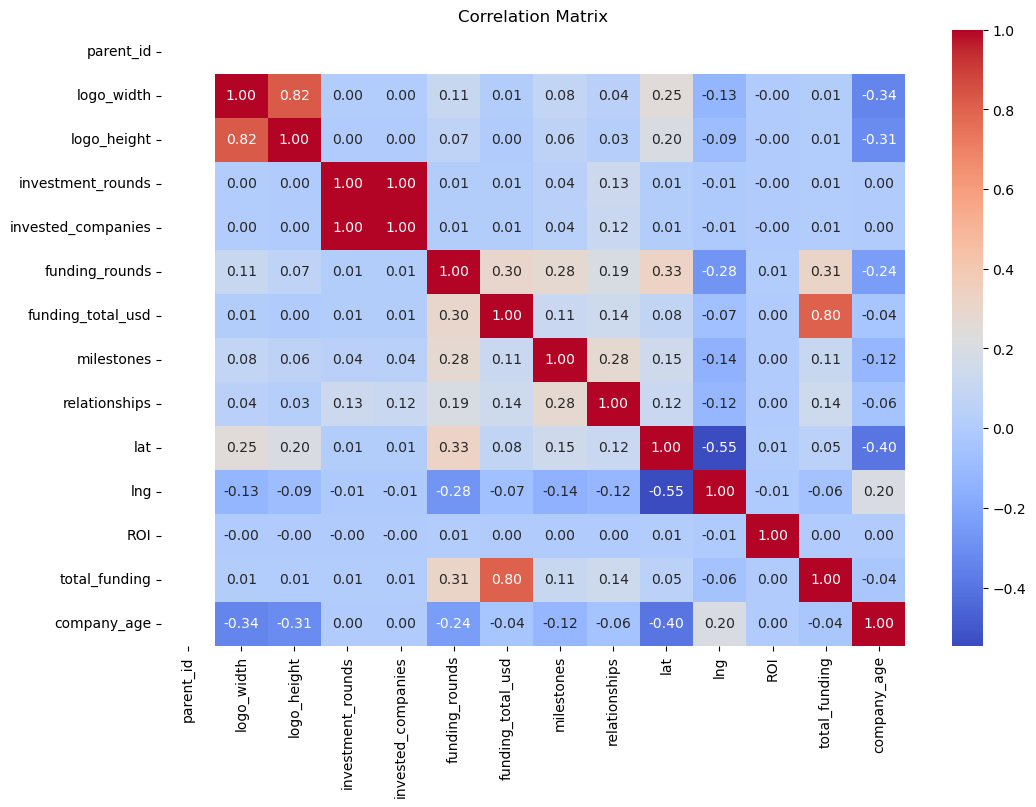

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [39]:
import matplotlib.pyplot as plt

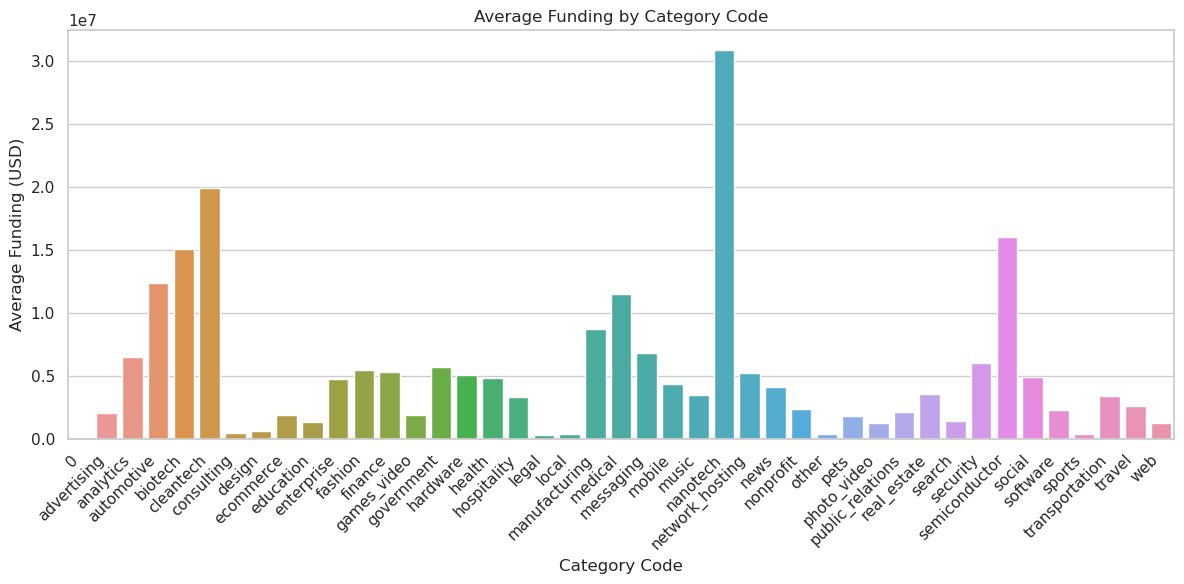

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by category_code and calculate average funding
average_funding_by_category = df.groupby('category_code')['funding_total_usd'].mean().reset_index()

# Set style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=average_funding_by_category, x='category_code', y='funding_total_usd')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category Code')
plt.ylabel('Average Funding (USD)')
plt.title('Average Funding by Category Code')
plt.tight_layout()
plt.show()

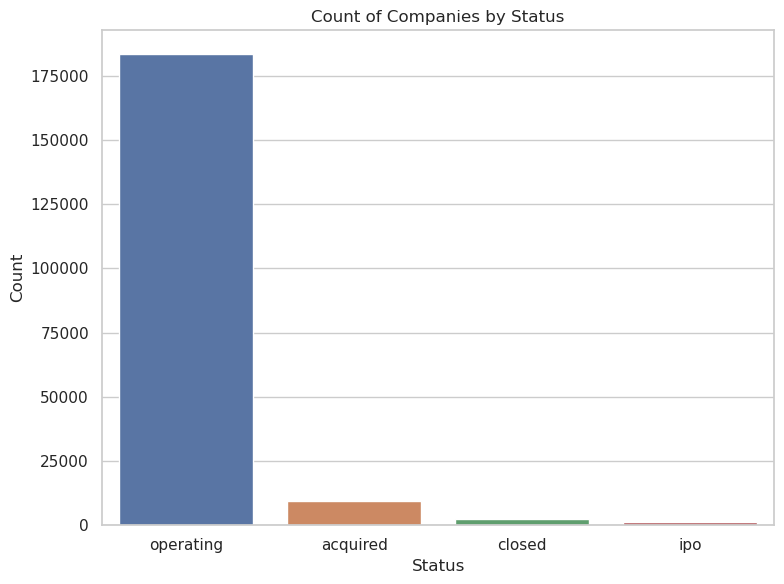

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of Companies by Status')
plt.tight_layout()
plt.show()

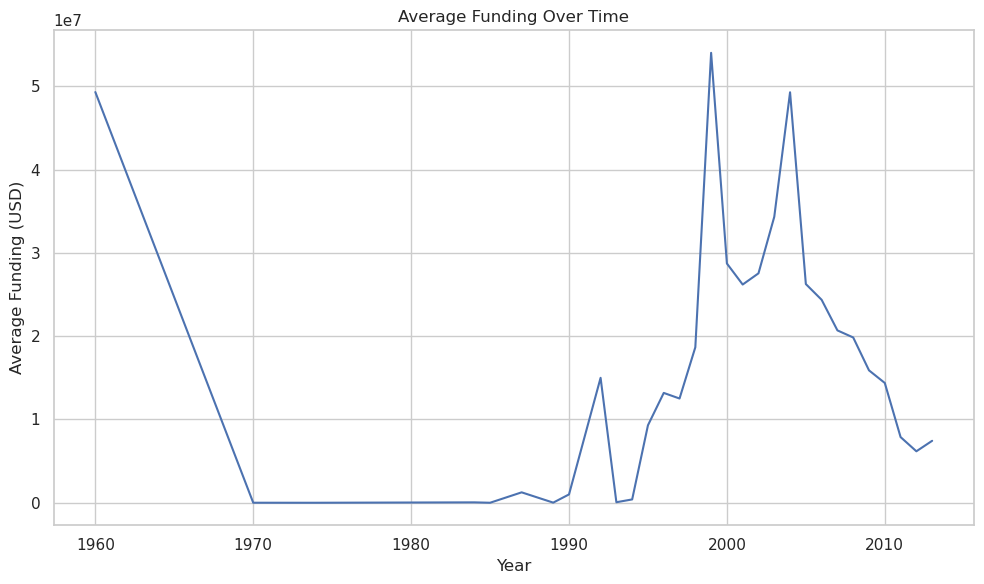

In [42]:
# Convert 'first_funding_at' to datetime format
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')

# Extract year from 'first_funding_at'
df['funding_year'] = df['first_funding_at'].dt.year

# Calculate average funding per year
average_funding_by_year = df.groupby('funding_year')['funding_total_usd'].mean().reset_index()

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_funding_by_year, x='funding_year', y='funding_total_usd')
plt.xlabel('Year')
plt.ylabel('Average Funding (USD)')
plt.title('Average Funding Over Time')
plt.tight_layout()
plt.show()

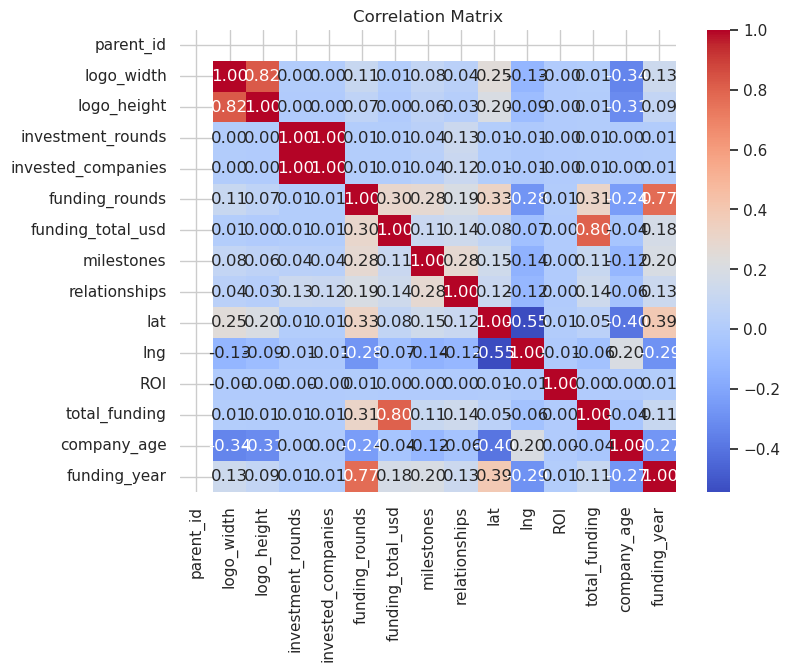

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


MODEL

In [44]:
from sklearn.model_selection import train_test_split
df['status'] = df['status'].astype('category').cat.codes  
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]
X = df_numeric.drop(columns=['status']) 
y = df_numeric['status']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (157242, 15), Testing set: (39311, 15)


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)  # R² score
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

# Display results
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R² Score: 0.0325
Mean Squared Error (MSE): 0.4429
Mean Absolute Error (MAE): 0.3174
